In [1]:
#%matplotlib notebook
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#file_input = 'input_test.txt'
#file_input = 'input_test_basic.txt'
file_input = 'input.txt'

In [3]:
with open(file_input) as f:
    lines = f.read().split('\n')

In [4]:
lines

['16,8,6',
 '19,11,14',
 '10,12,4',
 '7,4,14',
 '9,4,5',
 '11,4,17',
 '14,17,13',
 '4,10,15',
 '10,4,15',
 '8,12,18',
 '16,16,6',
 '10,10,3',
 '9,8,20',
 '11,1,10',
 '3,4,9',
 '7,10,5',
 '3,13,5',
 '9,5,18',
 '7,13,6',
 '15,17,11',
 '2,11,13',
 '15,5,6',
 '15,15,7',
 '4,8,15',
 '1,14,9',
 '4,15,9',
 '17,13,8',
 '15,19,11',
 '17,12,5',
 '16,12,2',
 '6,15,15',
 '7,4,11',
 '9,19,6',
 '12,18,14',
 '16,9,3',
 '9,3,17',
 '18,10,8',
 '10,5,16',
 '20,9,12',
 '4,15,14',
 '17,7,13',
 '10,6,16',
 '3,4,12',
 '13,10,19',
 '5,4,8',
 '14,15,16',
 '17,11,3',
 '6,12,18',
 '12,9,19',
 '15,17,15',
 '10,2,12',
 '11,6,3',
 '3,10,4',
 '8,11,19',
 '9,2,9',
 '4,11,5',
 '6,4,11',
 '14,13,16',
 '11,8,18',
 '16,11,5',
 '9,2,14',
 '13,8,16',
 '17,9,5',
 '15,5,7',
 '18,6,9',
 '6,5,8',
 '18,13,12',
 '12,4,4',
 '15,6,7',
 '17,13,6',
 '15,3,6',
 '9,12,20',
 '7,7,4',
 '4,5,7',
 '12,12,2',
 '17,9,17',
 '7,5,5',
 '3,14,8',
 '13,18,11',
 '16,17,7',
 '6,6,15',
 '16,7,4',
 '5,13,4',
 '7,19,6',
 '8,15,18',
 '10,13,19',
 '12

In [5]:
cubes_coords = []
for l0 in lines:
    if l0!='':
        coords_str = l0.split(',')
        coords = [ int(coords_str[0]) , int(coords_str[1]), int(coords_str[2])]
        cubes_coords.append(coords)

In [6]:
cubes_coords_np = np.array(cubes_coords)

In [7]:
#Get maximums to define boolean 3D array shape
maxs = np.max(cubes_coords_np, axis=0)
maxs

array([21, 21, 21])

In [8]:
#Get maximums to define boolean 3D array shape
mins = np.min(cubes_coords_np, axis=0)
mins

array([0, 0, 0])

In [9]:
maxs-mins

array([21, 21, 21])

In [10]:
cubes_coords_np -= mins 
cubes_coords_np+=1 #margin
cubes_coords_np

array([[17,  9,  7],
       [20, 12, 15],
       [11, 13,  5],
       ...,
       [15, 12,  6],
       [ 6, 11,  6],
       [ 9, 21, 11]])

In [11]:
boolregion = np.zeros( (maxs-mins)+3, dtype=bool)

In [12]:
#Use fancy indexing to mark the cubes
boolregion[cubes_coords_np[:,0], cubes_coords_np[:,1], cubes_coords_np[:,2]]=True

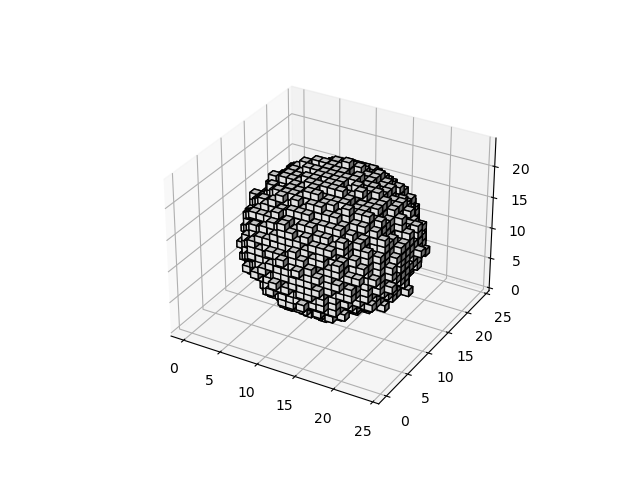

In [13]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(boolregion, facecolors='white', edgecolor='k')
plt.show()

Fill with water using a flooding algorithm

Start with corners having water

In [14]:
has_water = np.zeros_like(boolregion)

In [15]:
has_water[0,0,0]=True
has_water[-1,0,0]=True
has_water[-1,-1,0]=True
has_water[0,-1,0]=True
has_water[0,0,-1]=True
has_water[-1,0,-1]=True
has_water[-1,-1,-1]=True
has_water[0,-1,-1]=True

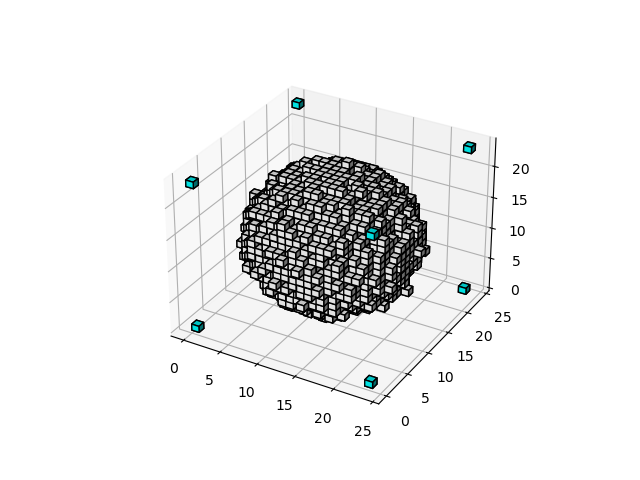

In [16]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(boolregion, facecolors='white', edgecolor='k')
ax.voxels(has_water, facecolors='cyan', edgecolor='k')

plt.show()

Do the flooding taking care not to flood areas that are already occupied by a cube

In [18]:
#Do the flooding
has_water0= has_water.copy()
boolregion0 = boolregion.copy()

while True:
    count_water0 = np.sum(has_water0) # to track changes. If no changes, stop flooding

    for i in range(3): #floods in all axis directions
        #Flood downwards. If above has water, and there is no cube
        has_water0[1:,:,:] = np.logical_or(has_water0[1:,:,:], np.logical_and(has_water0[:-1,:,:], np.logical_not(boolregion0[1:,:,:])) )

        #Flood upwards
        has_water0[:-1,:,:] = np.logical_or(has_water0[:-1,:,:], np.logical_and(has_water0[1:,:,:], np.logical_not(boolregion0[:-1,:,:])))

        has_water0 = np.transpose(has_water0, axes=(1,2,0))
        boolregion0 = np.transpose(boolregion0, axes=(1,2,0))

    count_water1 = np.sum(has_water0)

    if count_water0==count_water1:
        #No flooding occured so stop the while loop
        #has_water0 = np.transpose(has_water0, axes=(1,2,0))
        #boolregion0 = np.transpose(boolregion0, axes=(1,2,0))
        break

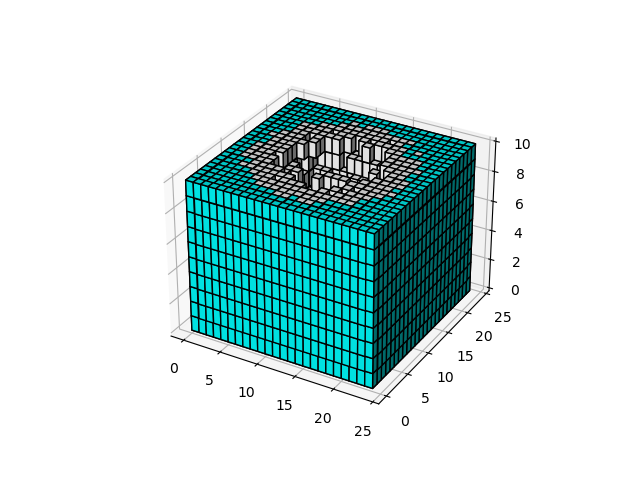

In [19]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(boolregion0[:,:,0:10], facecolors='white', edgecolor='k')
ax.voxels(has_water0[:,:,0:10], facecolors='cyan', edgecolor='k')
plt.show()

It appears to be marked OK. The inner empty space is not marked with water

In [20]:
has_water0.shape

(24, 24, 24)

In [21]:
boolregion.shape

(24, 24, 24)

Count the cube faces.

Only count those faces that are exposed to the water. Don't need to use the no cube-presence-check to count

In [22]:
sum_cubefaces=0

boolregion1 = boolregion0.copy()
has_water1 = has_water0.copy()

for i in range(3):
    #Top faces
    sum_cubefaces+=  np.sum( boolregion1[1:,:,:] & has_water1[:-1,:,:] ) 
    #Bottom faces
    sum_cubefaces+=  np.sum( has_water1[1:,:,:] & boolregion1[:-1,:,:] )

    boolregion1 = np.transpose(boolregion1, axes=(1,2,0)) #zyx becomes yxz
    has_water1 = np.transpose(has_water1, axes=(1,2,0)) #zyx becomes yxz

sum_cubefaces

2540

OK